/tmp/ipykernel_504/3496347451.py:11: DtypeWarning: Columns (13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  quotes = pd.read_csv("/home/jake/TAQ-Query-Scripts/data/raw_data/2020-01-02/AAPL_quotes_cleaned.csv")
/tmp/ipykernel_504/3496347451.py:12: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  recon = pd.read_csv("/home/jake/TAQ-Query-Scripts/data/raw_data/2020-01-02/AAPL_reconstructed.csv")


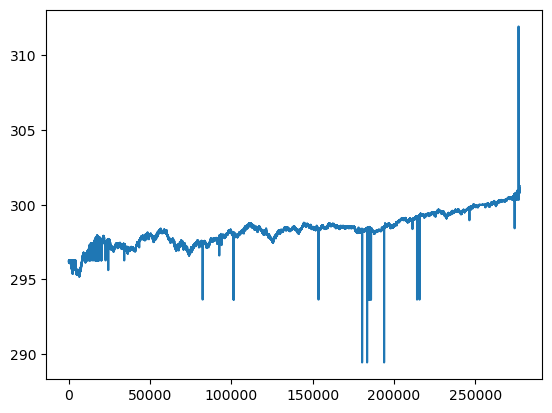

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
import configobj


trades = pd.read_csv("/home/jake/TAQ-Query-Scripts/data/raw_data/2020-01-02/AAPL_trades_cleaned.csv")
quotes = pd.read_csv("/home/jake/TAQ-Query-Scripts/data/raw_data/2020-01-02/AAPL_quotes_cleaned.csv")
recon = pd.read_csv("/home/jake/TAQ-Query-Scripts/data/raw_data/2020-01-02/AAPL_reconstructed.csv")


plt.plot(trades['Trade_Price'].values)

In [50]:
pd.set_option('display.max_columns', None)
recon.head(5)

,index,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,National_BBO_Indicator,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Security_Status_Indicator,YearMonth
0,2020-01-02 09:30:00.089010,2020-01-02,Q,AAPL,NaN,NaN,NaN,NaN,NaN,261711,NaN,NaN,1900-01-01 09:30:00.089010122,NaN,NaN,296.00,87.0,296.40,1.0,R,0.0,N,NaN,0.0,NaN,NaN,,202001.0
1,2020-01-02 09:30:00.095108,2020-01-02,Q,AAPL,NaN,NaN,NaN,NaN,NaN,261792,NaN,NaN,1900-01-01 09:30:00.095108640,NaN,NaN,296.00,107.0,296.40,1.0,R,0.0,N,NaN,0.0,NaN,NaN,,202001.0
2,2020-01-02 09:30:00.134049,2020-01-02,P,AAPL,NaN,NaN,NaN,NaN,NaN,262392,NaN,NaN,1900-01-01 09:30:00.134049792,NaN,NaN,296.09,1.0,296.30,66.0,R,0.0,N,NaN,0.0,NaN,NaN,,202001.0
3,2020-01-02 09:30:00.134062,2020-01-02,P,AAPL,NaN,NaN,NaN,NaN,NaN,262393,NaN,NaN,1900-01-01 09:30:00.134062592,NaN,NaN,296.09,1.0,296.29,1.0,R,2.0,N,NaN,0.0,NaN,NaN,,202001.0
4,2020-01-02 09:30:00.134071,2020-01-02,Z,AAPL,NaN,NaN,NaN,NaN,NaN,262384,NaN,NaN,1900-01-01 09:30:00.134071000,NaN,NaN,295.91,1.0,296.81,1.0,R,0.0,N,NaN,0.0,NaN,NaN,,202001.0


In [2]:
reg_trades=trades[(trades['Sale_Condition']=='@   ') | (trades['Sale_Condition']=='@ I ') | (trades['Sale_Condition']=='@ T ') | (trades['Sale_Condition']=='@ TI') ]
reg_trades1=trades[(trades['Sale_Condition']=='@   ')]
#read up on boolean indexing
reg_trades1.head(25)
reg_trades.info()
reg_trades1.info()
reg_trades.index=pd.to_datetime(reg_trades.index)

<class 'pandas.core.frame.DataFrame'>
Index: 91512 entries, 2020-01-02 09:30:00.134336 to 2020-01-02 19:59:57.963903
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    91512 non-null  object 
 1   Exchange                                91512 non-null  object 
 2   Symbol                                  91512 non-null  object 
 3   Trade_Volume                            91512 non-null  int64  
 4   Trade_Price                             91512 non-null  float64
 5   Sale_Condition                          91512 non-null  object 
 6   Source_of_Trade                         91512 non-null  object 
 7   Trade_Correction_Indicator              91512 non-null  int64  
 8   Sequence_Number                         91512 non-null  int64  
 9   Trade_Id                                91512 non-null  int64  
 10  Trade_Reporting_F

In [55]:
reg_trades.head(10)

,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
2020-01-02 09:30:00.134336,2020-01-02,K,AAPL,250,296.240,@,N,0,19803,1100,,1900-01-01 09:30:00.134336000,NaN,0
2020-01-02 09:30:00.134532,2020-01-02,K,AAPL,108,296.210,@,N,0,19805,1102,,1900-01-01 09:30:00.134532000,NaN,0
2020-01-02 09:30:00.324487,2020-01-02,Q,AAPL,3,296.230,@ TI,N,0,20309,1738,,1900-01-01 09:30:00.324487738,NaN,0
2020-01-02 09:30:00.638103,2020-01-02,Q,AAPL,2,296.210,@ TI,N,0,20958,1740,,1900-01-01 09:30:00.638103355,NaN,0
2020-01-02 09:30:00.717000,2020-01-02,D,AAPL,100,296.265,@,N,0,21113,424,Q,1900-01-01 09:30:00.717000000,9.300072e+13,0
2020-01-02 09:30:00.727000,2020-01-02,D,AAPL,106,296.250,@,N,0,24710,543,Q,1900-01-01 09:30:00.727000000,9.300331e+13,0
2020-01-02 09:30:00.734000,2020-01-02,D,AAPL,100,296.265,@,N,0,21152,425,Q,1900-01-01 09:30:00.734000000,9.300074e+13,0
2020-01-02 09:30:00.737000,2020-01-02,D,AAPL,100,296.250,@,N,0,26391,1057,N,1900-01-01 09:30:00.737000000,9.300551e+13,0
2020-01-02 09:30:00.745000,2020-01-02,D,AAPL,200,296.265,@,N,0,21250,428,Q,1900-01-01 09:30:00.745000000,9.300078e+13,0
2020-01-02 09:30:00.745000,2020-01-02,D,AAPL,100,296.265,@,N,0,21223,427,Q,1900-01-01 09:30:00.745000000,9.300077e+13,0


In [5]:
reg_trades =reg_trades[reg_trades.index < datetime.strptime(f"2020-01-02 16:00:00", "%Y-%m-%d %H:%M:%S")]
reg_trades.head(5)
reg_trades.tail(5)

,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
2020-01-02 15:59:59.944257,2020-01-02,Z,AAPL,100,300.6000,@,N,0,3110845,32698,,1900-01-01 15:59:59.944257000,NaN,0
2020-01-02 15:59:59.944442,2020-01-02,Q,AAPL,600,300.5900,@,N,0,3110843,68692,,1900-01-01 15:59:59.944442194,NaN,0
2020-01-02 15:59:59.982000,2020-01-02,D,AAPL,500,300.5900,@,N,0,3110962,69192,Q,1900-01-01 15:59:59.982000000,1.559600e+14,0
2020-01-02 15:59:59.986000,2020-01-02,D,AAPL,380,300.5904,@,N,0,3110970,69193,Q,1900-01-01 15:59:59.986000000,1.559600e+14,0
2020-01-02 15:59:59.993000,2020-01-02,D,AAPL,250,300.5800,@,N,0,3110977,69194,Q,1900-01-01 15:59:59.993000000,1.559600e+14,0


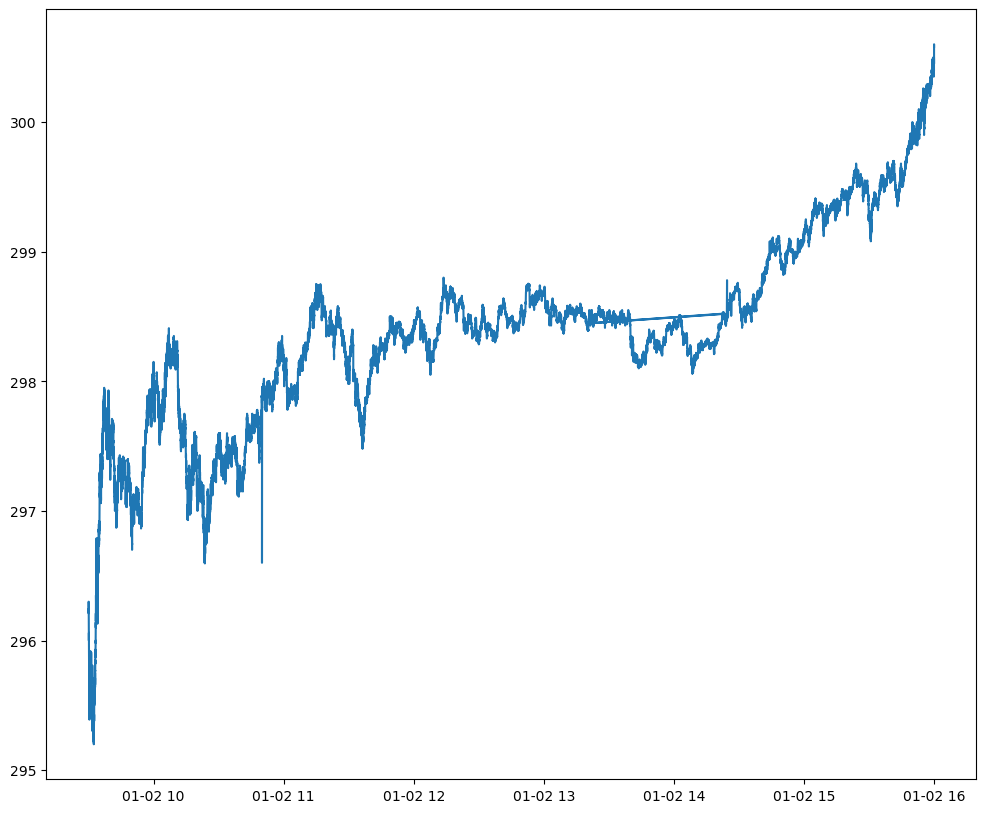

In [6]:
fig,ax=plt.subplots(figsize=(12,10))
ax.plot(reg_trades.index,reg_trades["Trade_Price"])

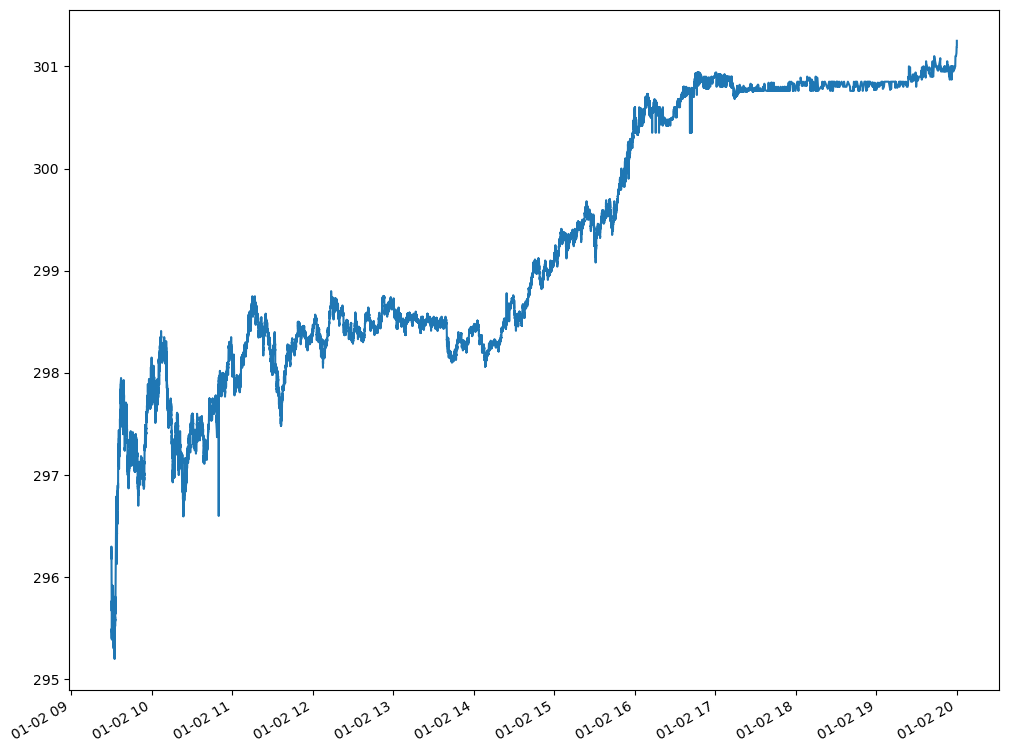

In [7]:
tradePriceGraph = reg_trades["Trade_Price"].plot(figsize=(12,10),alpha=1)

Text(0.5, 0, 'Time')

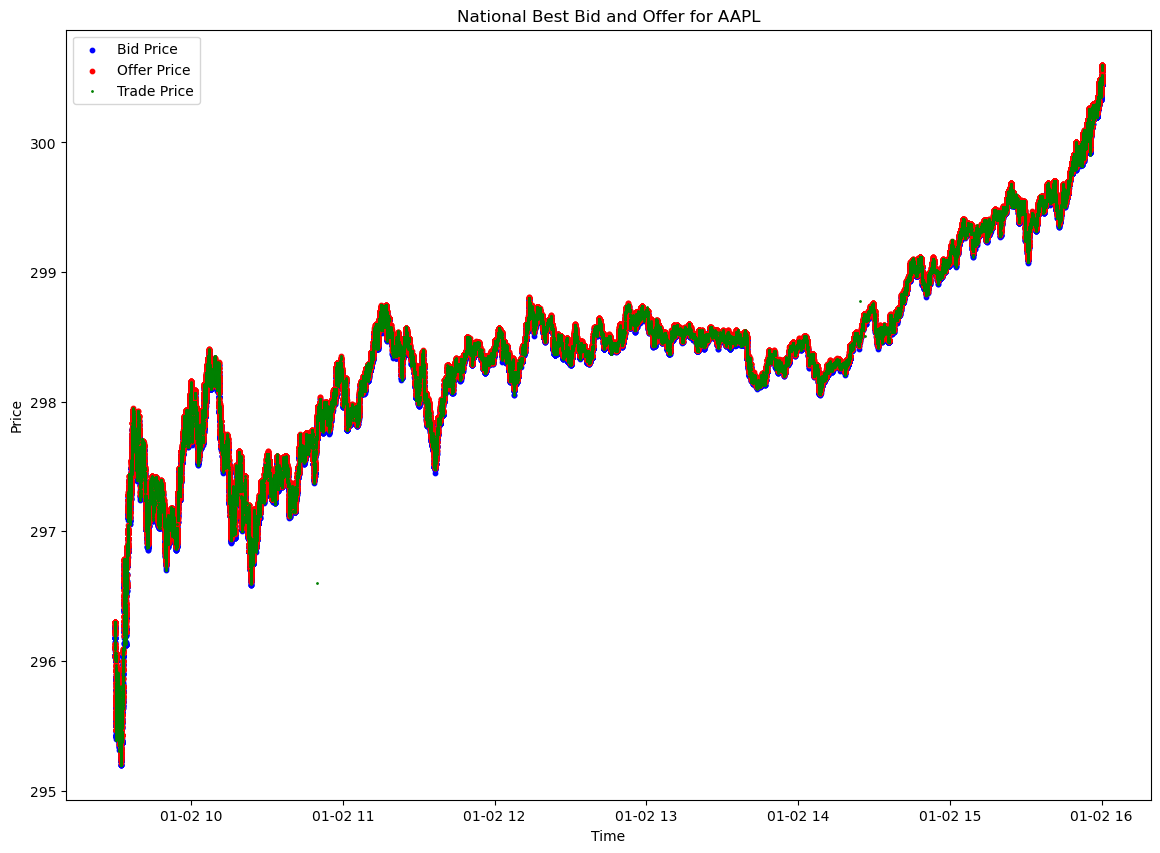

In [7]:
nbbo_quotes=quotes[(quotes['National_BBO_Indicator']==4)]
nbbo_quotes.index=pd.to_datetime(nbbo_quotes.index)
nbbo_quotes_filtered=nbbo_quotes[nbbo_quotes.index < datetime.strptime(f"2020-01-02 16:00:00", "%Y-%m-%d %H:%M:%S")]
fig,ax=plt.subplots(1,1,figsize=(14,10))
ax.scatter(nbbo_quotes_filtered.index,nbbo_quotes_filtered['Bid_Price'],s=10,label='Bid Price',color='blue',marker='o')
ax.scatter(nbbo_quotes_filtered.index,nbbo_quotes_filtered['Offer_Price'],s=10,label='Offer Price',color='red',marker='o')
ax.scatter(reg_trades.index,reg_trades['Trade_Price'],s=1,label='Trade Price',color='green')
ax.legend()

ax.set_title('National Best Bid and Offer for AAPL')
ax.set_ylabel('Price')
ax.set_xlabel('Time')

In [9]:
nbbo_quotes=quotes[quotes['National_BBO_Indicator']==4]
nbbo_quotes.index=pd.to_datetime(nbbo_quotes.index)